# Mining Processes From Smart Contracts

In [ ]:
from web3 import Web3
w3 = Web3(Web3.WebsocketProvider("ws://127.0.0.1:8545", websocket_kwargs={'timeout': 60}))
w3.isConnected()

In [ ]:
import pprint
pp = pprint.PrettyPrinter(indent=2)

In [ ]:
events = {
    b"Created(bytes)": "",
    b"Started()": "",
    b"Finished(bytes)": "",
    b"TaskRequest(uint8,bytes)": "",
    b"TaskResponse(uint8,bytes)": "",
    b"SubChoreographyCreated(uint8,bytes,address)": "",
    b"SubChoreographyFinished(uint8,bytes,bool)": "",
    b"ThrewTrigger(uint8,bytes)": "",
    b"CaughtTrigger(uint8,bytes,address)": "",
    b"UncaughtTrigger(uint8,bytes,address)": "",
    b"ParticipantRegistered(address,uint8)": "",
    b"Interrupted()": "",
    b"Interrupting()": "",
    b"ChoreographyCreated(address,bytes)": "",
    b"DebugFlowExecuted(uint8)": "",
    b"DebugTokens(uint256)": ""
}

event_identifiers = {}

In [ ]:
import sha3
for key in events.keys():
    event_hash = sha3.keccak_256()
    event_hash.update(key)
    hash_sum = event_hash.hexdigest()
    events[key] = hash_sum
    event_identifiers[hash_sum] = key
    
pp.pprint(events)

In [ ]:
# first deployed contract from blockchain_etl
ROOT_CONTRACT_ADDRESS = w3.toChecksumAddress("0xbfca45b31a0ea9cc5081693d2f7fe5675449a32c")
FACTORY_ADDRESS_A = "0x54497Da55F80B125a2050373fb7230e5A4eFA077"
FACTORY_ADDRESS_B = "0x7F79072c37A02e1F9474aa18Be0B4FeAA68cE624"
PARTICIPANTS_CONTAINER = "0xcd23eCBBdBcC03aE1Bcf658Fd3893F2c6f87DeEf"

root_contract_filter = w3.eth.filter({
    "fromBlock": "0x0",
    "toBlock": "latest",
    "address": ROOT_CONTRACT_ADDRESS
})
root_event_list = root_contract_filter.get_all_entries()

contract_events = []

for event in root_event_list:
    topic = event["topics"][0].hex()[2:]
    if topic in event_identifiers.keys():
        contract_events.append(event_identifiers[topic])
    else:
        contract_events.append(topic)
    
    
pp.pprint(contract_events)

In [ ]:
def get_events_for_contract(address):
    contract_filter = w3.eth.filter({
        "fromBlock": "0x0",
        "toBlock": "latest",
        "address": w3.toChecksumAddress(address)
    })
    event_list = contract_filter.get_all_entries()
    contract_events = []

    for event in event_list:
        
        trace_event = {}
        
        block_number = event["blockNumber"]
        block = w3.eth.getBlock(block_number)
        block_time = block["timestamp"]
        trace_event["timestamp"] = block_time
        
        topic = event["topics"][0].hex()[2:] # remove 0x from hex string
        if topic in event_identifiers.keys():
            trace_event["event"] = event_identifiers[topic]
        else:
            trace_event["event"] = topic
            
        contract_events.append(trace_event)
    return(contract_events)

In [ ]:
# Contract addresses extracted w/ ethereum-etl
addresses = [
    "0x54497da55f80b125a2050373fb7230e5a4efa077",
    "0x7f79072c37a02e1f9474aa18be0b4feaa68ce624",
    "0xcd23ecbbdbcc03ae1bcf658fd3893f2c6f87deef",
    "0xac9de8da546a12587d1a135050a4bad03c9454a7",
    "0x985c0799c4e1d5df856ad8536a761ebc285e38da",
    "0x12126517e00d1658cfae45cb6ec3bdb23f2d7fee",
    "0x173eebf0087599ee2b2c26b0980bb2c3926fb213",
    "0x09eb457ed710b869f342b8887ae2201d165f03c5",
    "0x549b7f9a3f004f192a9775e1267ab6e0ef5b3a02",
    "0x1c71a360c98aee9b347b1ee22a4f0528ae2891be",
    "0xa65f710409afa8ae2bbe3703e5e7ba7924e9b678",
    "0xe355dc5beda5d9b3ff90a57ca25ea44c21c39a59",
    "0xb842518f16c9f5cc8bad2e207a0339211e48b6c8",
    "0x74f2170644de5637ec41ee73860bb332a936302e",
    "0x79d43cff7033bbf2106e26827b783f2f2b2f9924",
    "0x97a0ba2ba82abb04fbe80da3919a37fb8d1471fc",
    "0xc6af5b60104959a0ee25da0f499b079ad1cdc5aa",
    "0x0f46e37a9b1889fa0ff248d8a425bf8ee5190d9b",
    "0xee642fb45e9287dd4180dc9c6b855f5f98b72aa1",
    "0xac59e570330876cda6b4f0b74c63bee5c484cbcd",
    "0x92e6e66c57d2f72a7729b17c503397bd2ce39a14",
    "0x38736a9d62e8677da4b9d544e74c47c2dd555d8f",
    "0x7c847e665fc9b3a262ea70442a645edf81f2ded9",
    "0x1a09794e2aa64e44617fd5be93c013110b6e5cb2",
    "0xac4fc0474e53b5cdc11e86f11573eb3a39f83ba4",
    "0x4354e7cd384a739682c4f4965e1443c1a0199c26",
    "0x67c56bb418b131819a067ad922569af49031f26e",
    "0x2ce7e526a44b70bc8d4f8473eaa28b96b40d09e3",
    "0xae2d5b8088adca7722d60bbe45468fba4cdad9e3",
    "0xbfca45b31a0ea9cc5081693d2f7fe5675449a32c",
    "0x0b29f6a3a25738a963fbdf126a7279e393cb6699",
    "0xc2ed24bd410554a2419c5201063ad50ffef13354",
    "0xe516df8fd5d55b2bf311e19840aeb89fbfc4182f",
    "0xaac5270423ca6df6c709693d5b2a0cbc8d1a9acc",
    "0xf4401cace6efe3ee7f6b005d4163fa7d883e3acd",
    "0xabd883fe58425bd7ccec3287f4d36f1d291e8fbc",
    "0x76fa1baf78d2b05805c5e3d4dfa08073d45131f6",
    "0x45733739e78dc998e8b0012e7f6c3e66f1ec3b5f",
    "0x3a2516faa44c96eec910fd8234d4c8c1f6fc891c",
    "0x19fe432afda4a640268d61f066233369a0c28443",
    "0xb48bfbd80114f168ee09c6196a777600bdbae91d",
    "0x273c3f202d16ae19bc86e03b881a39effd70dfb0",
    "0xfddcb3db39345087e9579e94d3e3baa89c749a9f",
    "0x614c47782e17cdec596da3519d87aba979ec6f30",
    "0x15db36efb5885ef9ee0e58741123352d240ec340",
    "0x7498ff417f508c78917274b05b1b9ad6d0835fa9",
    "0x86279f768485d61eacbe2903fa35a9044c3c99ef",
    "0xba589199893528de8506e14e252043260e019074",
    "0x5a96556bd1b5659f7ee2c55450acf8ef0c725686",
    "0x1c3c7f949b93bdf774d8df0b2c0dbf29d1555a98",
    "0x457ab7594ba17c996282e87c9832e76d9a1c3644",
    "0xfc441d687c9b1996da1f780e21bd4dc5c4acb98a",
    "0x29c040896560141a9962f5a464be0c50999be495",
    "0x62a4b90872e0b8a9f7cb23ccdaebf52f45602eeb",
    "0x6406564ad50aee6591a610be6aedc468d8904797",
    "0xdb6d2884b8434a01a9e97d56919c25d835683999",
    "0xf06b61905935299c04e615a7c8fd078ee85fd579",
    "0x8b406644106c258cd04bd456530dc08c93df50c1",
    "0x37bd3669ef19a4db1b49686e12727dd833203d8c",
    "0xe35900d9f31891fb218fe0c15bf7cb24761372c0",
    "0xcdcc7023450eb3056da33479d8e8e312d27c0bb0",
    "0xefce392d4a8032bb807ae68875245631e9785160",
    "0x3b580a97a096091fbdf384c67f3a25bef3349bda",
    "0x84f7097a0ecfbc9c59036b60a253331b660ee716",
    "0xeb3db7248674c5c211f75fcdc84207587cd9e30d",
    "0xdcf0588abad8b6a3205a71554c6c2c7bdc1b0482",
    "0x7a97df1c6a8c986a84867e8902198ea4e9bb82f5",
    "0x3010ef3dad2fc818c7e6a14b16cebc068e6ed43d",
    "0x45c05aa8f4e9883f94d7a173e1502138b07e1739",
    "0x5855b36a02c9a0da49a12aa8e2810416b6e30e12",
    "0x0559f6665c230247195c0fd249b0fc0e2af94d4f",
    "0x82e66fa3951d962352a5ee6915857fa185efc2e2",
    "0xaacf0f5df5a6c2804f90a47786092786d639ce02",
    "0x38a209211e2184e407ca8264feea8fe2a49db0f7",
    "0x1aa0c1d591ae1b60a10fcfa39a4b6337dc7b1aed",
    "0x011efe7355e0291c82ffae662d9e6c0c03f1af3c",
    "0xb9c35d0152b84e52c0f1058d9526715d19f38a0d",
    "0xe1efc7f8f50e2607ae7c03e27c283339a95373f0",
    "0x08dd90815a16d9e5acf2ee03f808bc3bb6e20bc3"
]

In [ ]:
traces = []
#traces.append(get_events_for_contract(addresses[3]))

for address in addresses:
    #break
    events = get_events_for_contract(address)
    pp.pprint(events)
    traces.append(events)

In [ ]:
from opyenxes.factory.XFactory import XFactory
from opyenxes.id.XIDFactory import XIDFactory
from opyenxes.data_out.XesXmlSerializer import XesXmlSerializer

In [ ]:
log = XFactory.create_log()
for contract_events in traces:
    trace_id = 0
    trace = XFactory.create_trace()

    id_attribute = XFactory.create_attribute_id("id", "trace_id_" + str(trace_id))
    trace.get_attributes()["id"] = id_attribute
    trace_id = trace_id + 1

    for event in contract_events:
        event_descriptor = event["event"]    
        log_event = XFactory.create_event()
        timestamp_int = event["timestamp"]
        timestamp_attribute = XFactory.create_attribute_timestamp(
            "time:timestamp", timestamp_int)
        activity_attribute = XFactory.create_attribute_literal(
            "concept:name", event_descriptor)
        log_event.get_attributes(
        )["timestamp"] = timestamp_attribute
        log_event.get_attributes()["Activity"] = activity_attribute
        trace.append(log_event)

    log.append(trace)

with open("event_log.xes", "w") as file:
    XesXmlSerializer().serialize(log, file)


## Alpha Miner

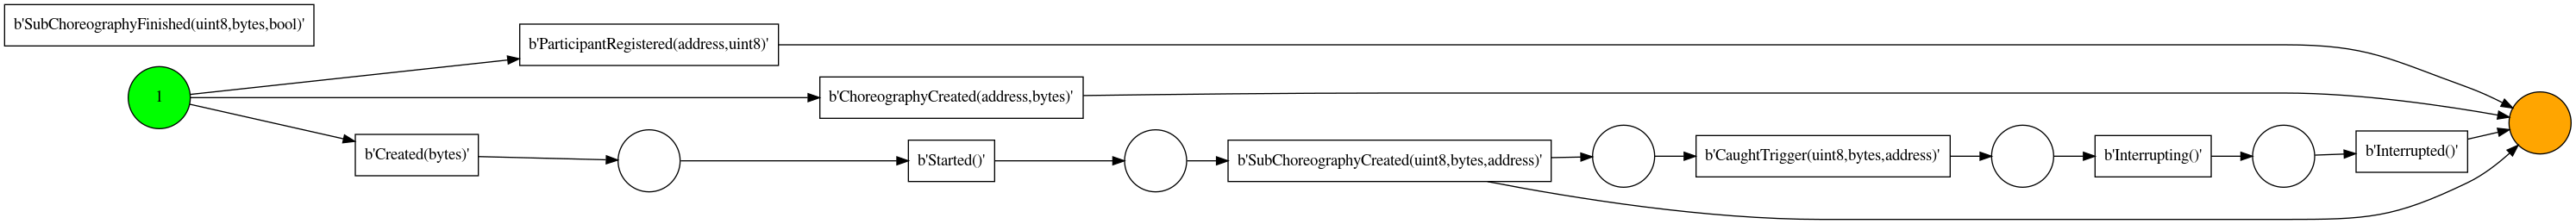

In [9]:
from pm4py.algo.discovery.alpha import factory as alpha_miner
from pm4py.objects.log.importer.xes import factory as xes_importer
from pm4py.visualization.petrinet import factory as vis_factory
log = xes_importer.import_log('event_log.xes')
net, initial_marking, final_marking = alpha_miner.apply(log)
gviz = vis_factory.apply(net, initial_marking, final_marking)
vis_factory.view(gviz)

## Inductive Miner

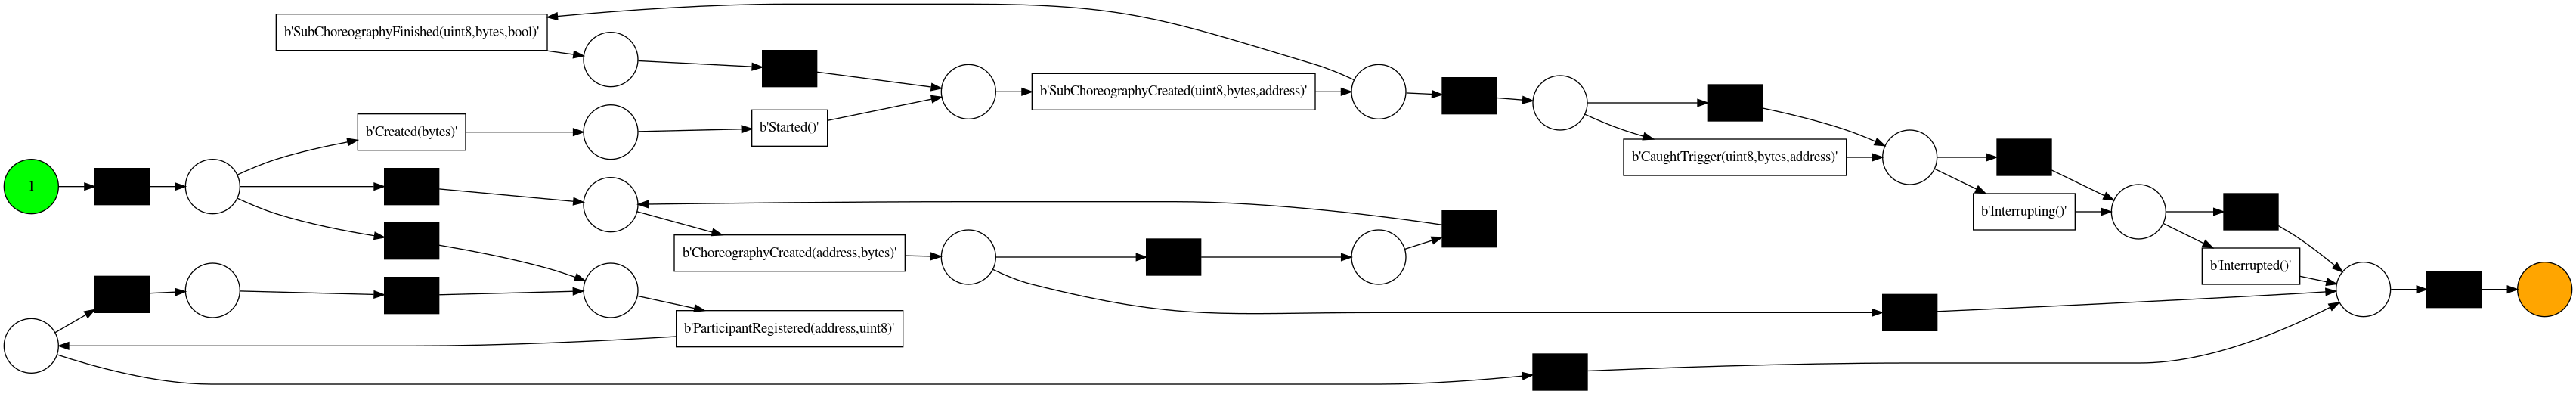

In [15]:
import os
from pm4py.objects.log.importer.xes import factory as xes_importer
from pm4py.algo.discovery.inductive import factory as inductive_miner
from pm4py.visualization.process_tree import factory as pt_vis_factory

og = xes_importer.import_log(os.path.join("event_log.xes"))
net, initial_marking, final_marking = inductive_miner.apply(log)


gviz = vis_factory.apply(net, initial_marking, final_marking)
vis_factory.view(gviz)


## Heuristic Miner

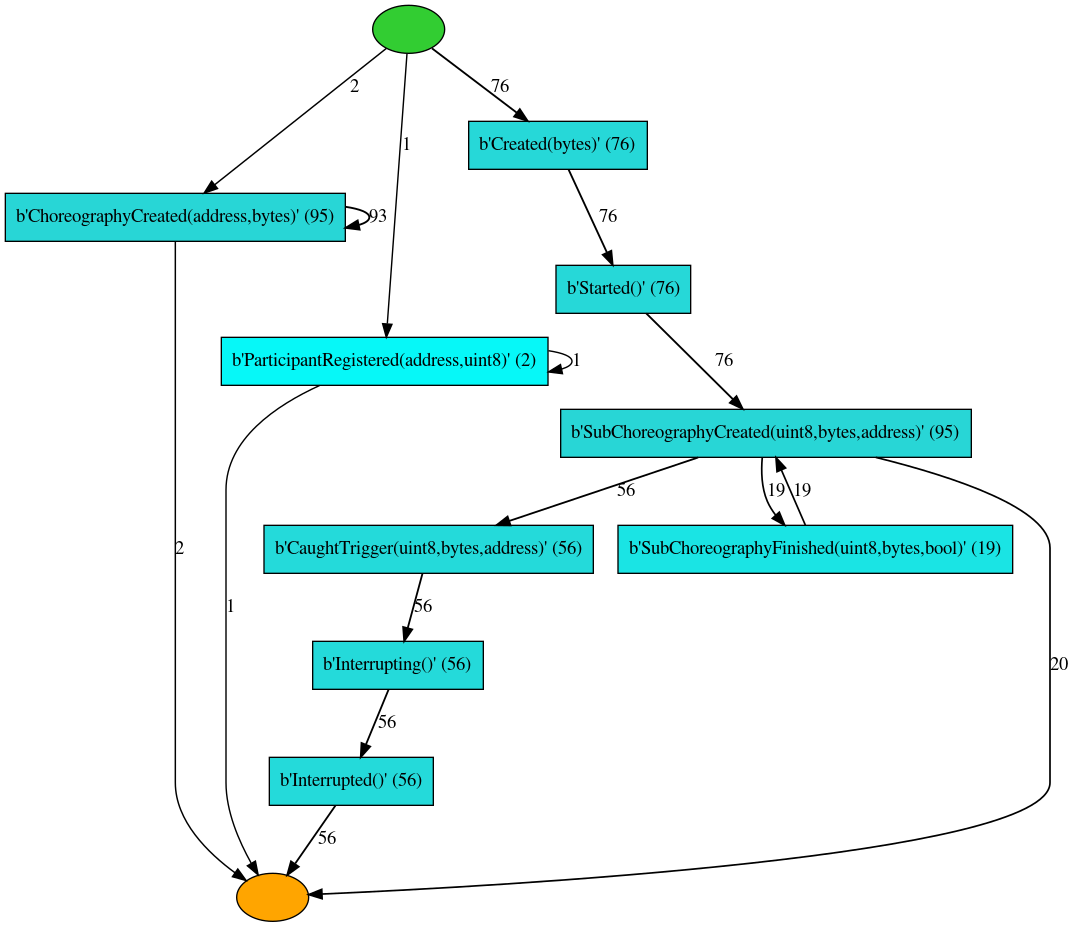

In [23]:
from pm4py.objects.log.importer.xes import factory as xes_importer
import os
log_path = os.path.join("event_log.xes")
log = xes_importer.apply(log_path)

from pm4py.algo.discovery.heuristics import factory as heuristics_miner
heu_net = heuristics_miner.apply_heu(log, parameters={"dependency_thresh": 0.5})


from pm4py.visualization.heuristics_net import factory as hn_vis_factory
gviz = hn_vis_factory.apply(heu_net)
hn_vis_factory.view(gviz)